In [138]:
import pandas as pd
import numpy as np
import ast

from wordcloud import WordCloud
from collections import Counter




# Graphic libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


# Models
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
stop = set(stopwords.words('english'))
import eli5
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder


In [139]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')


dict_columns = ['belongs_to_collection','genres','production_companies','production_countries',
               'spoken_languages','Keywords','cast','crew']


def text_to_dict(df,dict_columns):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df

train = text_to_dict(train,dict_columns)
test = text_to_dict(test,dict_columns)

In [140]:
train.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [141]:
train.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

In [142]:
for i,e in enumerate(train['belongs_to_collection'][:5]):
    print(i,e)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 {}
3 {}
4 {}


In [143]:
train['belongs_to_collection'].apply(lambda e: len(e) if e !={} else 0).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

In [144]:
# Belongs to collection can be parsed as a text column

train['collection_name'] = train['belongs_to_collection'].apply(lambda x:x[0]['name'] if x!= {} else 0)
train['has_collection'] = train['belongs_to_collection'].apply(lambda x: 1 if x!={} else 0)


test['collection_name'] = test['belongs_to_collection'].apply(lambda x:x[0]['name'] if x!= {} else 0)
test['has_collection'] = test['belongs_to_collection'].apply(lambda x: 1 if x!={} else 0)

train = train.drop(['belongs_to_collection'],axis = 1)
test = test.drop(['belongs_to_collection'],axis = 1)

In [145]:
# Generes

In [146]:
train['genres'][:5]

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
Name: genres, dtype: object

In [147]:
# Number of generes ina film
train['genres'].apply(lambda x:len(x) if x!={} else 0).value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

In [148]:
list_of_generes = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x!= {} else []).values)

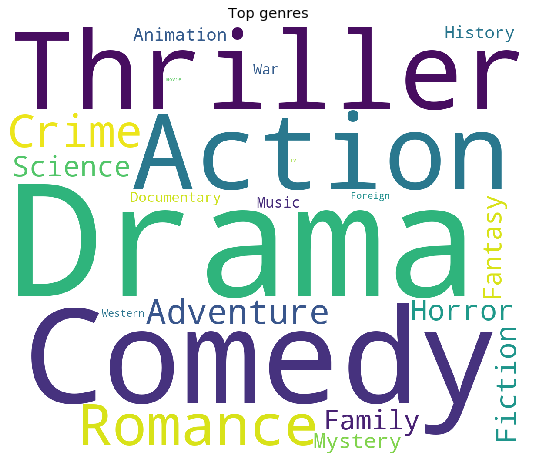

In [149]:
plt.figure(figsize=(12,8))

text = ' '.join([i for j in list_of_generes for i in j])

wordCloud = WordCloud(max_font_size = None,background_color='white',collocations=False,width=1200,height = 1000).generate(text)

plt.imshow(wordCloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

In [150]:
Counter([i for j in list_of_generes for i in j]).most_common()

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

In [151]:
# Seperate Column for first 15 columns

top_15_genres = [i[0] for i in Counter([i for j in list_of_generes for i in j]).most_common(15)]

In [152]:
train['num_genres'] = train['genres'].apply(lambda x: len(x) if x!={} else 0)
train['all_genres'] = train['genres'].apply(lambda x: ' '.join(sorted(i['name'] for i in x)) if x!={} else '')

for g in top_15_genres:
    train['genre_'+g] = train['all_genres'].apply(lambda x: 1 if g in x else 0)
    
test['num_genres'] = test['genres'].apply(lambda x: len(x) if x!={} else 0)
test['all_genres'] = test['genres'].apply(lambda x: ' '.join(sorted(i['name'] for i in x)) if x!={} else '')

for g in top_15_genres:
    test['genre_'+g] = train['all_genres'].apply(lambda x: 1 if g in x else 0)
    
train = train.drop(['genres'],axis = 1)
test = test.drop(['genres'],axis = 1)

In [153]:
# Production Companies

for i,e in enumerate(train['production_companies'][:5]):
    print(i,e)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 {}
4 {}


In [154]:
# Number of Production companies

(train['production_companies'].apply(lambda x: len(x) if x !={} else 0)).value_counts()

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: production_companies, dtype: int64

In [155]:
list_of_companies = list(train['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)


Counter([j for i in list_of_companies for j in i]).most_common(30)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30),
 ('Fox Searchlight Pictures', 29),
 ('StudioCanal', 28),
 ('Lionsgate', 28),
 ('DreamWorks SKG', 27),
 ('Fox 2000 Pictures', 25),
 ('Summit Entertainment', 24),
 ('Hollywood Pictures', 24),
 ('Orion Pictures', 24),
 ('Amblin Entertainment', 23),
 ('Dimension Films', 23)]

In [156]:
top_30_companies = [c[0] for c in Counter([j for i in list_of_companies for j in i]).most_common(30)]


train['num_companies'] = train['production_companies'].apply(lambda x : len(x) if x!= {} else 0)
train['all_companies'] = train['production_companies'].apply(lambda x : ' '.join(sorted([i['name'] for i in x])))
for c in top_30_companies:
    train['company_'+c] = train['all_companies'].apply(lambda x: 1 if c in x else 0)


    
test['num_companies'] = test['production_companies'].apply(lambda x : len(x) if x!= {} else 0)
test['all_companies'] = test['production_companies'].apply(lambda x : ' '.join(sorted([i['name'] for i in x])))

for c in top_30_companies:
    test['company_'+c] = test['all_companies'].apply(lambda x: 1 if c in x else 0)
    
    
train = train.drop(['production_companies'],axis = 1)
test = test.drop(['production_companies'],axis = 1)
    


In [157]:
# Production Countries

for i, e in enumerate(train['production_countries'][:5]):
    print(i,e)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'IN', 'name': 'India'}]
4 [{'iso_3166_1': 'KR', 'name': 'South Korea'}]


In [158]:
# Number of Production Countries in films

(train['production_countries'].apply(lambda x: len(x) if x!= {} else 0)).value_counts()

1    2222
2     525
3     116
4      57
0      55
5      21
6       3
8       1
Name: production_countries, dtype: int64

In [159]:
list_of_countries = list(train['production_countries'].apply(lambda x: [i['name'] for i in x] if x!={} else []).values)
Counter([j for i in list_of_countries for j in i]).most_common(25)

[('United States of America', 2282),
 ('United Kingdom', 380),
 ('France', 222),
 ('Germany', 167),
 ('Canada', 120),
 ('India', 81),
 ('Italy', 64),
 ('Japan', 61),
 ('Australia', 61),
 ('Russia', 58),
 ('Spain', 54),
 ('China', 42),
 ('Hong Kong', 42),
 ('Ireland', 23),
 ('Belgium', 23),
 ('South Korea', 22),
 ('Mexico', 19),
 ('Sweden', 18),
 ('New Zealand', 17),
 ('Netherlands', 15),
 ('Czech Republic', 14),
 ('Denmark', 13),
 ('Brazil', 12),
 ('Luxembourg', 10),
 ('South Africa', 10)]

In [160]:
top_25_countries = [i[0] for i in Counter([j for i in list_of_countries for j in i]).most_common(25)]

train['num_countries'] = train['production_countries'].apply( lambda x: len(x) if x!={} else 0 )
train['all_countries'] = train['production_countries'].apply( lambda x: ' '.join(sorted([i['name'] for i in x])) if x!={} else '')

for c in top_25_countries:
    train['country_'+c] = train['all_countries'].apply(lambda x: 1 if c in x else 0)
    
    
test['num_countries'] = test['production_countries'].apply( lambda x: len(x) if x!={} else 0 )
test['all_countries'] = test['production_countries'].apply( lambda x: ' '.join(sorted([i['name'] for i in x])) if x!={} else '')

for c in top_25_countries:
    test['country_'+c] = test['all_countries'].apply(lambda x: 1 if c in x else 0)
    

train = train.drop(['production_countries'],axis = 1)
test = test.drop(['production_countries'],axis = 1)


In [161]:
# Spoken Language

for i, e in enumerate(train['spoken_languages'][:5]):
    print(i,e)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
2 [{'iso_639_1': 'en', 'name': 'English'}]
3 [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]
4 [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]


In [162]:
# Number of spoken languages in flims
(train['spoken_languages'].apply(lambda x:len(x) if x!= {} else 0)).value_counts()

1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: spoken_languages, dtype: int64

In [163]:
list_of_languages = list(train['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x!={} else []).values)

Counter([j for i in list_of_languages for j in i]).most_common(15)

[('English', 2618),
 ('Français', 288),
 ('Español', 239),
 ('Deutsch', 169),
 ('Pусский', 152),
 ('Italiano', 124),
 ('日本語', 89),
 ('普通话', 68),
 ('हिन्दी', 56),
 ('', 47),
 ('Português', 43),
 ('العربية', 40),
 ('한국어/조선말', 37),
 ('广州话 / 廣州話', 36),
 ('தமிழ்', 27)]

In [164]:
top_30_languages =[ i[0] for i in Counter([j for i in list_of_languages for j in i]).most_common(30)]

train['num_languages'] = train['spoken_languages'].apply(lambda x: len(x) if x!= {} else 0 )
train['all_languages'] = train['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x!= {} else '')

for l in top_30_languages:
    train['language_'+l] = train['all_languages'].apply(lambda x: 1 if l in x else 0)
    
test['num_languages'] = test['spoken_languages'].apply(lambda x: len(x) if x!= {} else 0 )
test['all_languages'] = test['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x!= {} else '')

for l in top_30_languages:
    test['language_'+l] = test['all_languages'].apply(lambda x: 1 if l in x else 0)
    

train = train.drop(['spoken_languages'],axis = 1)
test = test.drop(['spoken_languages'],axis = 1)

In [165]:
# KeyWords


In [166]:
for i, e in enumerate(train['Keywords'][:5]):
    print(i, e)


0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
2 [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
3 [{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'ne

In [167]:
print('Number of Keywords in films')
train['Keywords'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

Number of Keywords in films


5    293
0    276
4    248
3    228
6    227
2    207
7    192
1    187
8    161
9    134
Name: Keywords, dtype: int64

In [168]:
list_of_keywords = list(train['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

text = ' '.join(['_'.join(j.split(" ")) for i in list_of_keywords for j in i])

(-0.5, 1199.5, 999.5, -0.5)

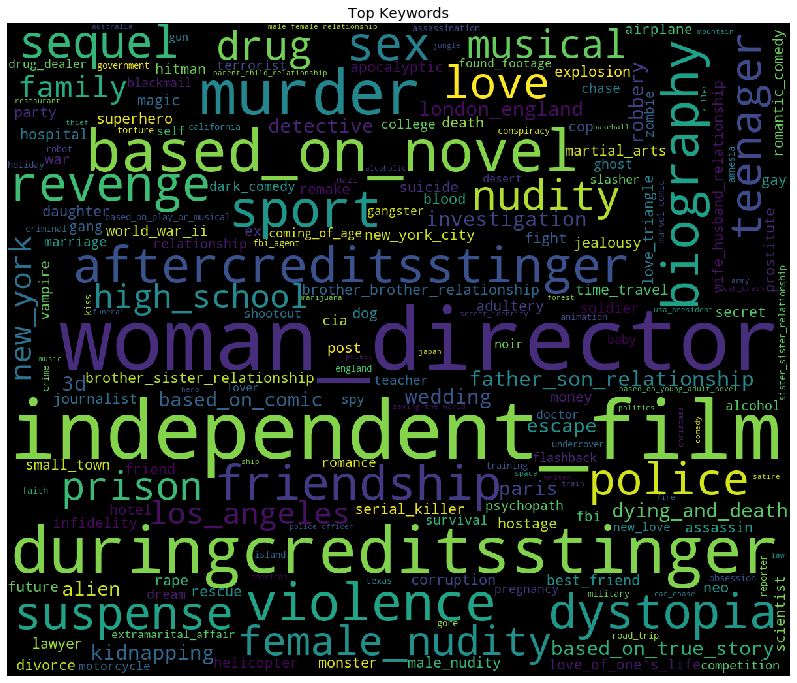

In [169]:
plt.figure(figsize=(16,12))
wordcloud = WordCloud(max_font_size=None,background_color='black',collocations=False,
                     width= 1200,height=1000).generate(text)

plt.imshow(wordcloud)
plt.title("Top Keywords")
plt.axis("off")

In [170]:
top_keywords = [m[0] for m in Counter([i for j in list_of_keywords for i in j]).most_common(30)]

train['num_keywords'] = train['Keywords'].apply(lambda x: len(x) if x!={} else 0)

train['all_Keywords'] = train['Keywords'].apply(lambda x:' '.join(sorted([i['name'] for i in x])) if x != {} else '')

for g in top_keywords:
    train['keyword_' + g] = train['all_Keywords'].apply(lambda x: 1 if g in x else 0)
    
test['num_Keywords'] = test['Keywords'].apply(lambda x: len(x) if x != {} else 0)
test['all_Keywords'] = test['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_keywords:
    test['keyword_' + g] = test['all_Keywords'].apply(lambda x: 1 if g in x else 0)
    
train = train.drop(['Keywords'],axis = 1)
test = test.drop(['Keywords'],axis = 1)

In [171]:
# Cast

In [172]:
print('Number of casted persons in films')
train['cast'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

Number of casted persons in films


15    212
16    165
10    135
13    129
12    124
11    122
9     118
17    118
18    115
14    110
Name: cast, dtype: int64

In [173]:
list_of_cast_names = list(train['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_cast_names for i in j]).most_common(15)

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23),
 ('Willem Dafoe', 23),
 ('Bill Murray', 22),
 ('Owen Wilson', 22),
 ('Nicolas Cage', 22),
 ('Sylvester Stallone', 21)]

In [174]:
list_of_cast_genders =  list(train['cast'].apply(lambda x : [i['gender'] for i in x] if x!= {} else []).values)

Counter([j for i in list_of_cast_genders for j in i]).most_common()

[(2, 27949), (0, 20329), (1, 13533)]

In [175]:
# 0 is unspecified, 1 is female & 2 is male

In [176]:
list_of_cast_characters = list(train['cast'].apply(lambda x: [i['character'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_cast_characters for i in j]).most_common(15)

[('', 818),
 ('Himself', 610),
 ('Herself', 155),
 ('Dancer', 144),
 ('Additional Voices (voice)', 100),
 ('Doctor', 77),
 ('Reporter', 70),
 ('Waitress', 69),
 ('Nurse', 65),
 ('Bartender', 55),
 ('Jack', 54),
 ('Debutante', 54),
 ('Security Guard', 50),
 ('Paul', 48),
 ('Frank', 44)]

In [177]:

train['num_cast'] = train['cast'].apply(lambda x : len(x) if x!={} else 0)

top_cast_names = [i[0] for i in Counter([i for j in list_of_cast_characters for i in j]).most_common(15)]

for c in top_cast_names:
    train['cast_name_'+c] = train['cast'].apply(lambda x: 1 if c in str(x) else 0)
    
train['gender_0_cast'] = train['cast'].apply(lambda x : sum([1 for i in x if i['gender']==0]))
train['gender_1_cast'] = train['cast'].apply(lambda x : sum([1 for i in x if i['gender']==1]))
train['gender_2_cast'] = train['cast'].apply(lambda x : sum([1 for i in x if i['gender']==2]))

top_cast_characters = [m[0] for m in Counter([i for j in list_of_cast_characters for i in j]).most_common(15)]

for g in top_cast_characters:
    train['cast_character_' + g] = train['cast'].apply(lambda x: 1 if g in str(x) else 0)
    
    
test['num_cast'] = test['cast'].apply(lambda x: len(x) if x != {} else 0)
for g in top_cast_names:
    test['cast_name_' + g] = test['cast'].apply(lambda x: 1 if g in str(x) else 0)
test['genders_0_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
test['genders_1_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
test['genders_2_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
for g in top_cast_characters:
    test['cast_character_' + g] = test['cast'].apply(lambda x: 1 if g in str(x) else 0)
    

train = train.drop(['cast'], axis=1)
test = test.drop(['cast'], axis=1)

In [178]:
# Crew

In [179]:
for i, e in enumerate(train['crew'][:1]):
    print(i, e[:10])

0 [{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}, {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}, {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}, {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id': 14

In [180]:
print('Number of casted persons in films')
train['crew'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

Number of casted persons in films


2     179
11    127
10    126
3     126
12    110
9     109
8     109
14    104
4     101
7      94
Name: crew, dtype: int64

In [181]:
list_of_crew_names = list(train['crew'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_names for i in j]).most_common(15)

[('Avy Kaufman', 50),
 ('Robert Rodriguez', 44),
 ('Deborah Aquila', 40),
 ('James Newton Howard', 39),
 ('Mary Vernieu', 38),
 ('Steven Spielberg', 37),
 ('Luc Besson', 37),
 ('Jerry Goldsmith', 37),
 ('Francine Maisler', 35),
 ('Tricia Wood', 35),
 ('James Horner', 33),
 ('Kerry Barden', 32),
 ('Bob Weinstein', 30),
 ('Harvey Weinstein', 30),
 ('Janet Hirshenson', 30)]

In [182]:
list_of_crew_jobs = list(train['crew'].apply(lambda x: [i['job'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_jobs for i in j]).most_common(15)

[('Producer', 6011),
 ('Executive Producer', 3459),
 ('Director', 3225),
 ('Screenplay', 2996),
 ('Editor', 2824),
 ('Casting', 2483),
 ('Director of Photography', 2288),
 ('Original Music Composer', 1947),
 ('Art Direction', 1821),
 ('Production Design', 1650),
 ('Costume Design', 1573),
 ('Writer', 1523),
 ('Set Decoration', 1345),
 ('Makeup Artist', 1108),
 ('Sound Re-Recording Mixer', 970)]

In [183]:
list_of_crew_genders = list(train['crew'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_genders for i in j]).most_common(15)

[(0, 41787), (2, 24898), (1, 6412)]

In [184]:
list_of_crew_departments = list(train['crew'].apply(lambda x: [i['department'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_departments for i in j]).most_common(14)

[('Production', 15887),
 ('Sound', 9319),
 ('Art', 8069),
 ('Crew', 7315),
 ('Writing', 6567),
 ('Costume & Make-Up', 6156),
 ('Camera', 5424),
 ('Directing', 4954),
 ('Editing', 4508),
 ('Visual Effects', 3591),
 ('Lighting', 1303),
 ('Actors', 4)]

In [185]:
list_of_crew_names = train['crew'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values
Counter([i for j in list_of_crew_names for i in j]).most_common(15)

[('Avy Kaufman', 50),
 ('Robert Rodriguez', 44),
 ('Deborah Aquila', 40),
 ('James Newton Howard', 39),
 ('Mary Vernieu', 38),
 ('Steven Spielberg', 37),
 ('Luc Besson', 37),
 ('Jerry Goldsmith', 37),
 ('Francine Maisler', 35),
 ('Tricia Wood', 35),
 ('James Horner', 33),
 ('Kerry Barden', 32),
 ('Bob Weinstein', 30),
 ('Harvey Weinstein', 30),
 ('Janet Hirshenson', 30)]

In [186]:
train['num_crew'] = train['crew'].apply(lambda x: len(x) if x != {} else 0)
top_crew_names = [m[0] for m in Counter([i for j in list_of_crew_names for i in j]).most_common(15)]
for g in top_crew_names:
    train['crew_name_' + g] = train['crew'].apply(lambda x: 1 if g in str(x) else 0)
train['genders_0_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train['genders_1_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train['genders_2_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
top_crew_jobs = [m[0] for m in Counter([i for j in list_of_crew_jobs for i in j]).most_common(15)]
for j in top_crew_jobs:
    train['jobs_' + j] = train['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
top_crew_departments = [m[0] for m in Counter([i for j in list_of_crew_departments for i in j]).most_common(15)]
for j in top_crew_departments:
    train['departments_' + j] = train['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 
    
test['num_crew'] = test['crew'].apply(lambda x: len(x) if x != {} else 0)
for g in top_crew_names:
    test['crew_name_' + g] = test['crew'].apply(lambda x: 1 if g in str(x) else 0)
test['genders_0_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
test['genders_1_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
test['genders_2_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
for j in top_crew_jobs:
    test['jobs_' + j] = test['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
for j in top_crew_departments:
    test['departments_' + j] = test['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 

train = train.drop(['crew'], axis=1)
test = test.drop(['crew'], axis=1)

In [187]:
train.shape,test.shape

((3000, 237), (4398, 236))

In [188]:
# Data Exploration

In [189]:
train.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,...,12,4,2,13,8,4,2,4,4,0
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,...,0,0,1,0,1,1,1,0,0,0
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,...,5,9,1,5,4,3,6,3,1,0
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,...,0,0,1,0,0,1,0,0,0,0
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,...,0,0,1,0,0,1,0,0,0,0


In [190]:
#Target

Text(0.5, 1.0, 'Distribution of log of revenue')

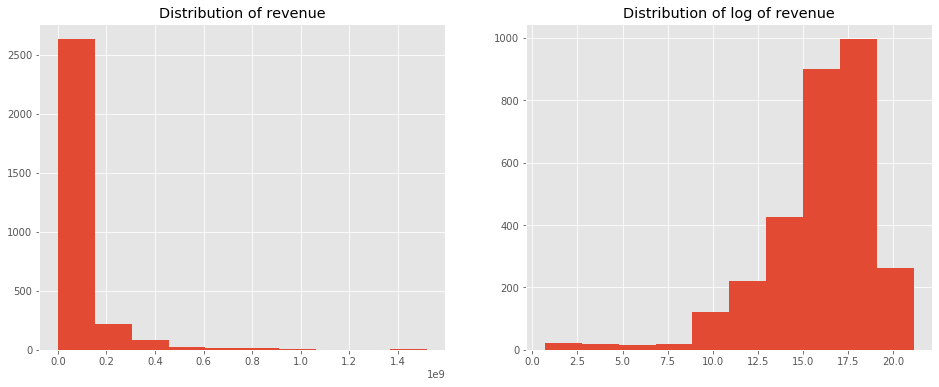

In [191]:
fig,ax = plt.subplots(figsize=(16,6))

plt.subplot(1,2,1)
plt.hist(train['revenue'])
plt.title("Distribution of revenue")

plt.subplot(1,2,2)
plt.hist(np.log1p(train['revenue']))
plt.title('Distribution of log of revenue')

In [192]:
# As we can see revenue distribution has high skewness
train['log_revenue'] = np.log1p(train['revenue'])

Text(0.5, 1.0, 'Distribution of log bidget')

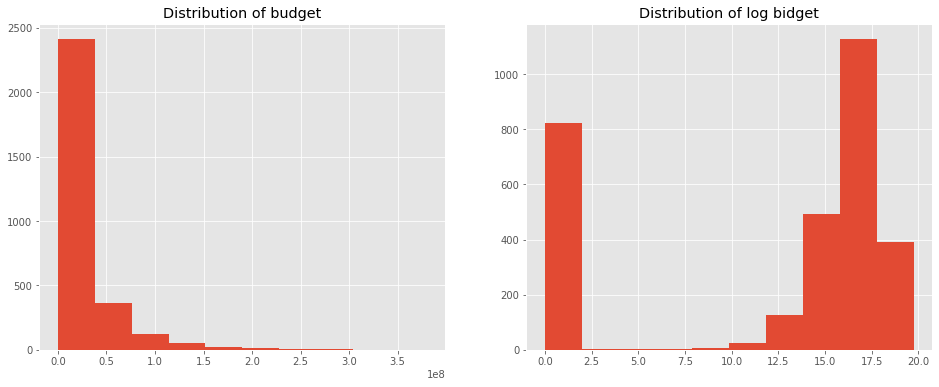

In [193]:
fig,ax = plt.subplots(figsize=(16,6))

plt.subplot(1,2,1)
plt.hist(train['budget'])
plt.title("Distribution of budget")


plt.subplot(1,2,2)
plt.hist(np.log1p(train['budget']))
plt.title("Distribution of log bidget")

Text(0.5, 1.0, 'Log Revenue vs Log Budget')

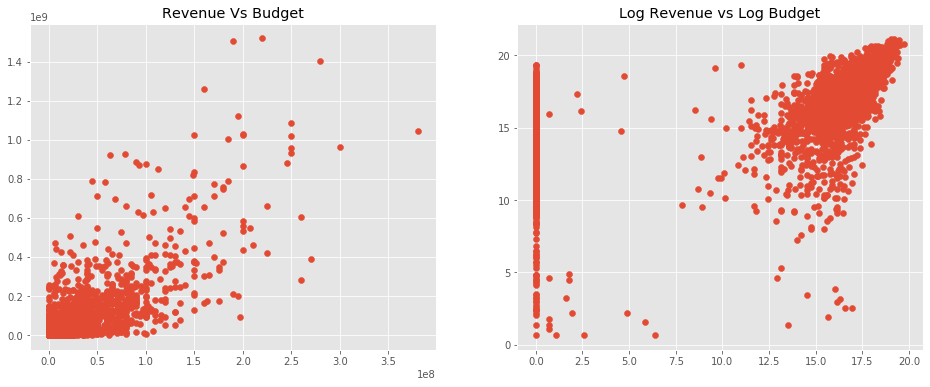

In [194]:
fig,ax = plt.subplots(figsize=(16,6))

plt.subplot(1,2,1)
plt.scatter(train['budget'],train['revenue'])
plt.title("Revenue Vs Budget")


plt.subplot(1,2,2)
plt.scatter(np.log1p(train['budget']),np.log1p(train['revenue']))
plt.title("Log Revenue vs Log Budget")

In [195]:
# We can see that budget and revenue are somewhat correlated. Logarithm transformation makes budget distribution more managable.

In [196]:
train['log_budget'] = np.log1p(train['budget'])
test['log_budget'] = np.log1p(test['budget'])

In [197]:
#Home Page

In [198]:
train['homepage'].value_counts()

http://www.transformersmovie.com/             4
http://www.lordoftherings.net/                2
http://www.thehobbit.com/                     2
http://www.sonyclassics.com/thewackness/      1
http://www.invincibleironmandvd.com/          1
                                             ..
http://www.extract-the-movie.com/             1
http://www.miramax.com/movie/clerks/          1
http://www.discoverthecabininthewoods.com/    1
https://www.facebook.com/PointBreakMovie      1
http://DontThinkTwiceMovie.com                1
Name: homepage, Length: 941, dtype: int64

In [199]:
# Most of homepages are unique, so this feature may be useless.

In [200]:
train['has_homepage'] = 0
train.loc[train['homepage'].isnull()==False,'has_homepage']=1

test['has_homepage'] = 0
test.loc[test['homepage'].isnull()==False,'has_homepage']=1

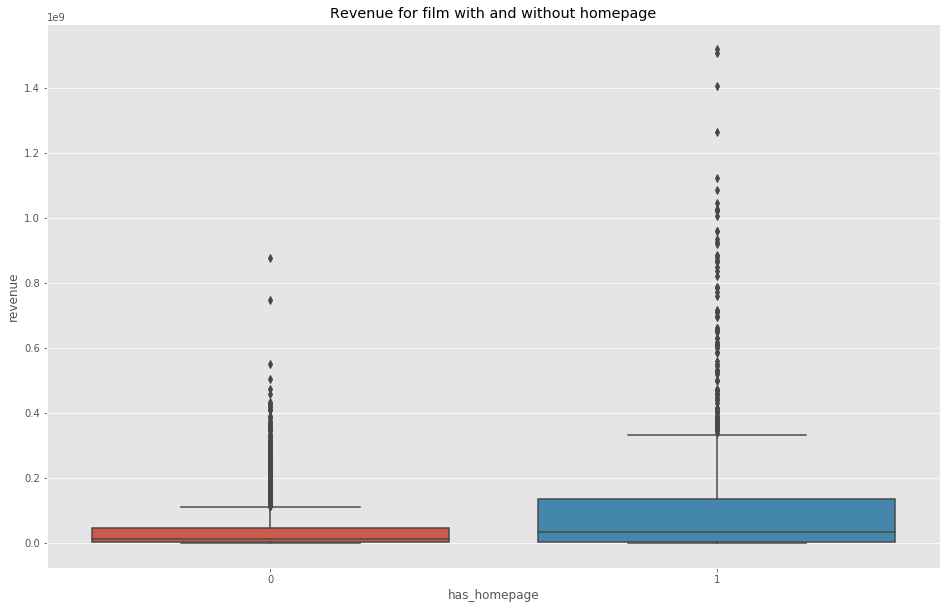

In [201]:

plt.figure(figsize=(16,10))
plt.title("Revenue for film with and without homepage")
sns.boxplot(x='has_homepage',y='revenue',data = train)

In [202]:
# Films with homepage tend to generate more revenue! I suppose people can know more about the film thanks to homepage.

In [203]:
# original_language

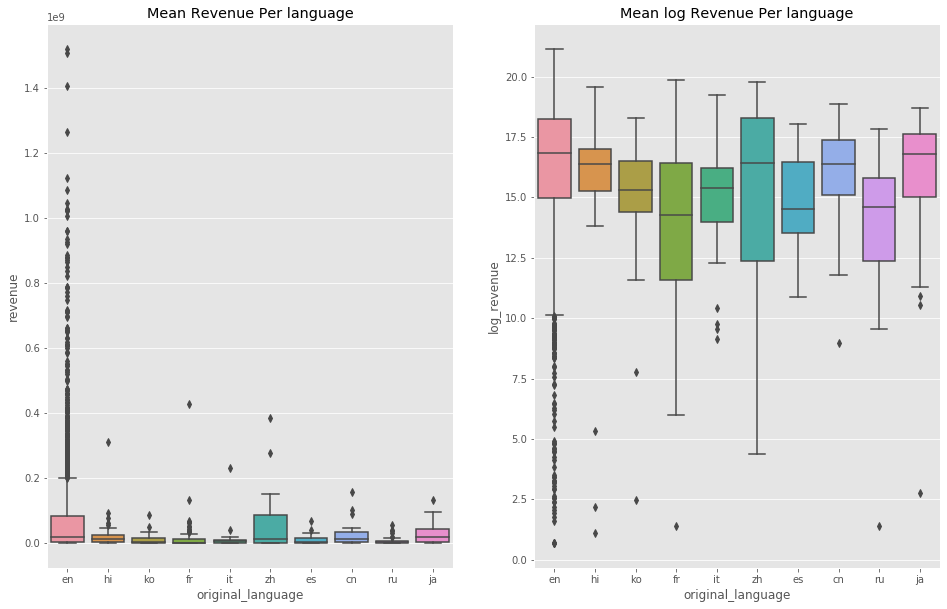

In [204]:
fig,ax = plt.subplots(figsize=(16,10))

plt.subplot(1,2,1)
plt.title("Mean Revenue Per language")
sns.boxplot(x='original_language',y='revenue',data = train.loc[train['original_language'].\
                                                               isin(train['original_language'].value_counts().\
                                                                    head(10).index)])
plt.subplot(1,2,2)
plt.title("Mean log Revenue Per language")
sns.boxplot(x='original_language',y='log_revenue',data = train.loc[train['original_language'].\
                                                               isin(train['original_language'].value_counts().\
                                                                    head(10).index)])

In [205]:
# As we know there are much more english films and they have a higher range of values. Films with the highest revenue are usually in English, but there are also high revenue films in other languages.

In [206]:
# original_title

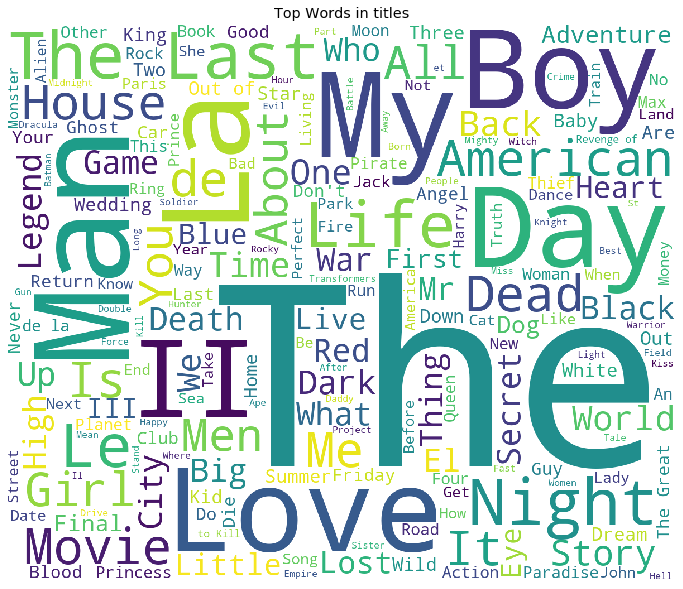

In [207]:
plt.figure(figsize=(12,12))

text = ' '.join(list(train['original_title']))

wordcloud = WordCloud(max_font_size=None,background_color='white',width=1200,height=1000).generate(text)

plt.imshow(wordcloud)
plt.title('Top Words in titles')
plt.axis('off')
plt.show()

In [208]:
# Overview

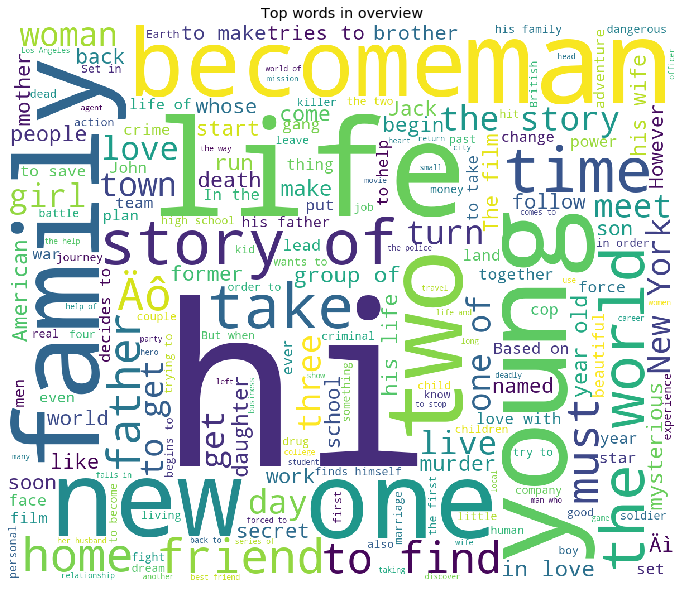

In [209]:
plt.figure(figsize = (12, 12))
text = ' '.join(train['overview'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000,stopwords=stop).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in overview')
plt.axis("off")
plt.show()

In [210]:
# Let's try to see which words have high impact on the revenue. I ll build a simple model and use ELI5 for this.

In [211]:
vectorizer = TfidfVectorizer(
sublinear_tf=True,
analyzer='word',
token_pattern=r'\w{1,}',
ngram_range=(1,2),
min_df=5
)

overview_text = vectorizer.fit_transform(train['overview'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text,train['log_revenue'])
eli5.show_weights(linreg,vec=vectorizer,top=20,feature_filter=lambda x: x != '<BIAS>')

In [212]:
print('Target value:', train['log_revenue'][1000])
eli5.show_prediction(linreg,doc=train['overview'].values[1000],vec=vectorizer)

Target value: 16.44583954907521


In [213]:
# We can see that some words can be used to predict revenue, but we will need more that overview text to build a good model.

In [214]:
# Popularity

In [215]:
# I'm not exactly sure what does popularity represents. Maybe it is some king of weighted rating, maybe something else. It seems it has low correlation with the target.

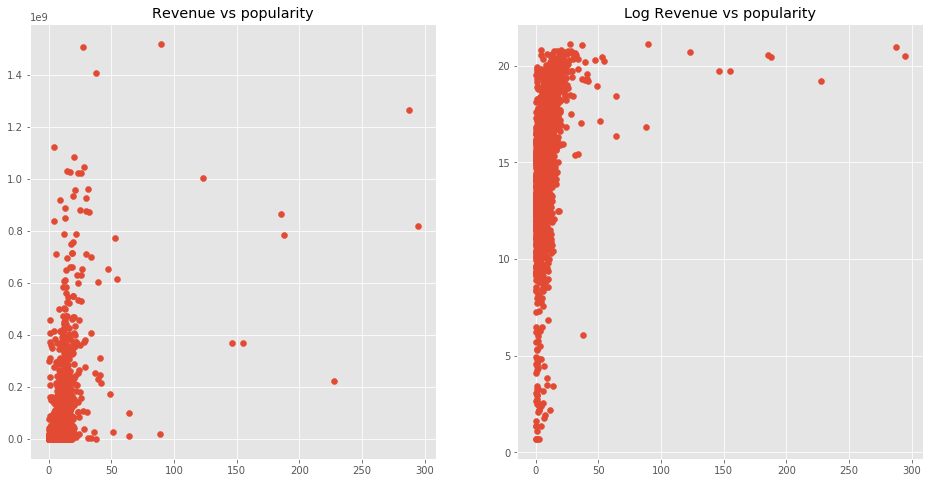

In [216]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['popularity'], train['revenue'])
plt.title('Revenue vs popularity');
plt.subplot(1, 2, 2)
plt.scatter(train['popularity'], train['log_revenue'])
plt.title('Log Revenue vs popularity');

In [217]:
# Release_date

In [218]:
test.loc[test['release_date'].isnull() == True, 'release_date'] = '01/01/98'

In [219]:
test.loc[test['release_date'].isnull(), 'release_date']

Series([], Name: release_date, dtype: object)

In [220]:
def fix_date(x):
    '''
    Fixes dates which are in 20xx
    '''
    year = x.split('/')[2]
    if int(year)<=19:
        return x[:-2]+'20'+year
    else:
        return x[:-2]+'19'+year

In [221]:
train['release_date'] = train['release_date'].apply(lambda x:fix_date(str(x)))
test['release_date'] = test['release_date'].apply(lambda x: fix_date(str(x)))

train['release_date'] = pd.to_datetime(train['release_date'])
test['release_date'] = pd.to_datetime(test['release_date'])


In [222]:
# Creating features based on dates

def process_date(df):
    date_parts = ['year','weekday','month','weekofyear','day','quarter']
    
    for part in date_parts:
        part_col = 'release_date'+'_'+part
        df[part_col] = getattr(df['release_date'].dt,part).astype(int)
    return df

train = process_date(train)
test = process_date(test)

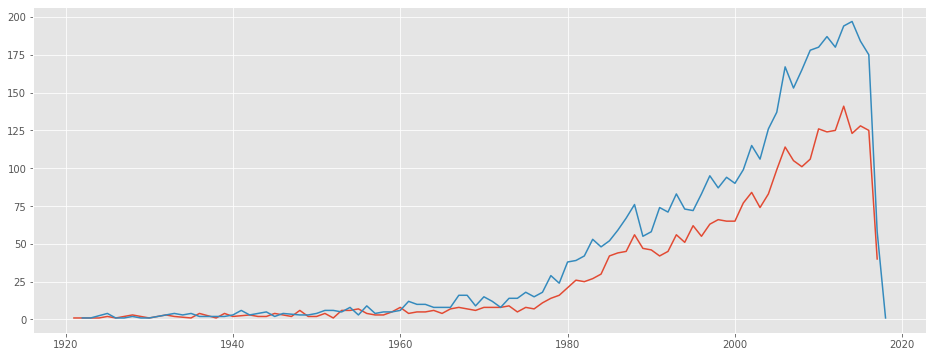

In [223]:
d1 = train['release_date_year'].value_counts().sort_index()
d2 = test['release_date_year'].value_counts().sort_index()
plt.figure(figsize=(16,6))
plt.plot(d1)
plt.plot(d2)
plt.show()

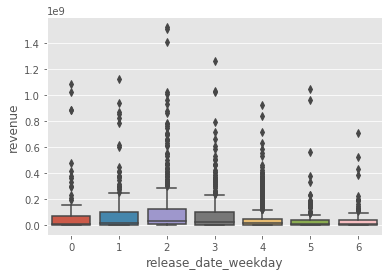

In [224]:
sns.boxplot(x='release_date_weekday',y='revenue',data=train)

In [225]:
# Collection

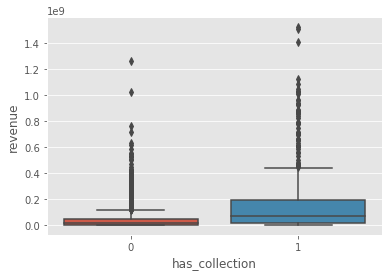

In [226]:
sns.boxplot(x='has_collection', y='revenue', data=train);

In [227]:
# Genres

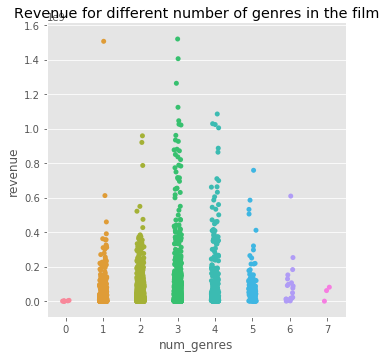

In [228]:
sns.catplot(x='num_genres', y='revenue', data=train);
plt.title('Revenue for different number of genres in the film');

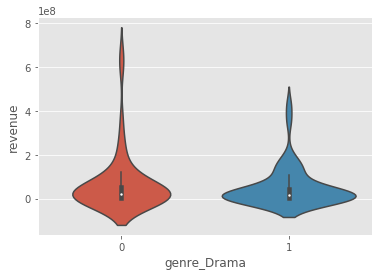

In [229]:
sns.violinplot(x='genre_Drama', y='revenue', data=train[:100]);

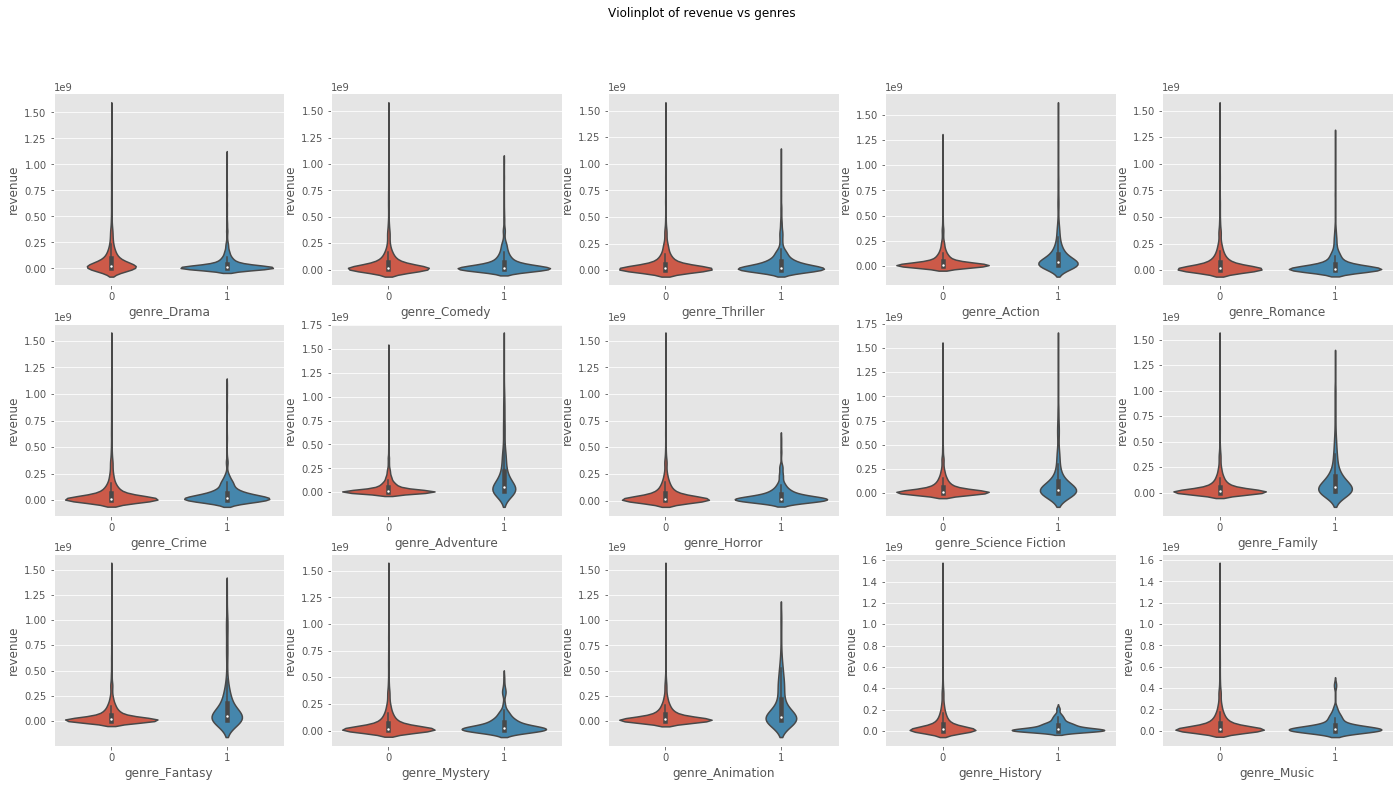

In [230]:
f, axes = plt.subplots(3, 5, figsize=(24, 12))
plt.suptitle('Violinplot of revenue vs genres')
for i, e in enumerate([col for col in train.columns if 'genre_' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 5][i % 5]);

In [231]:
# Production companies

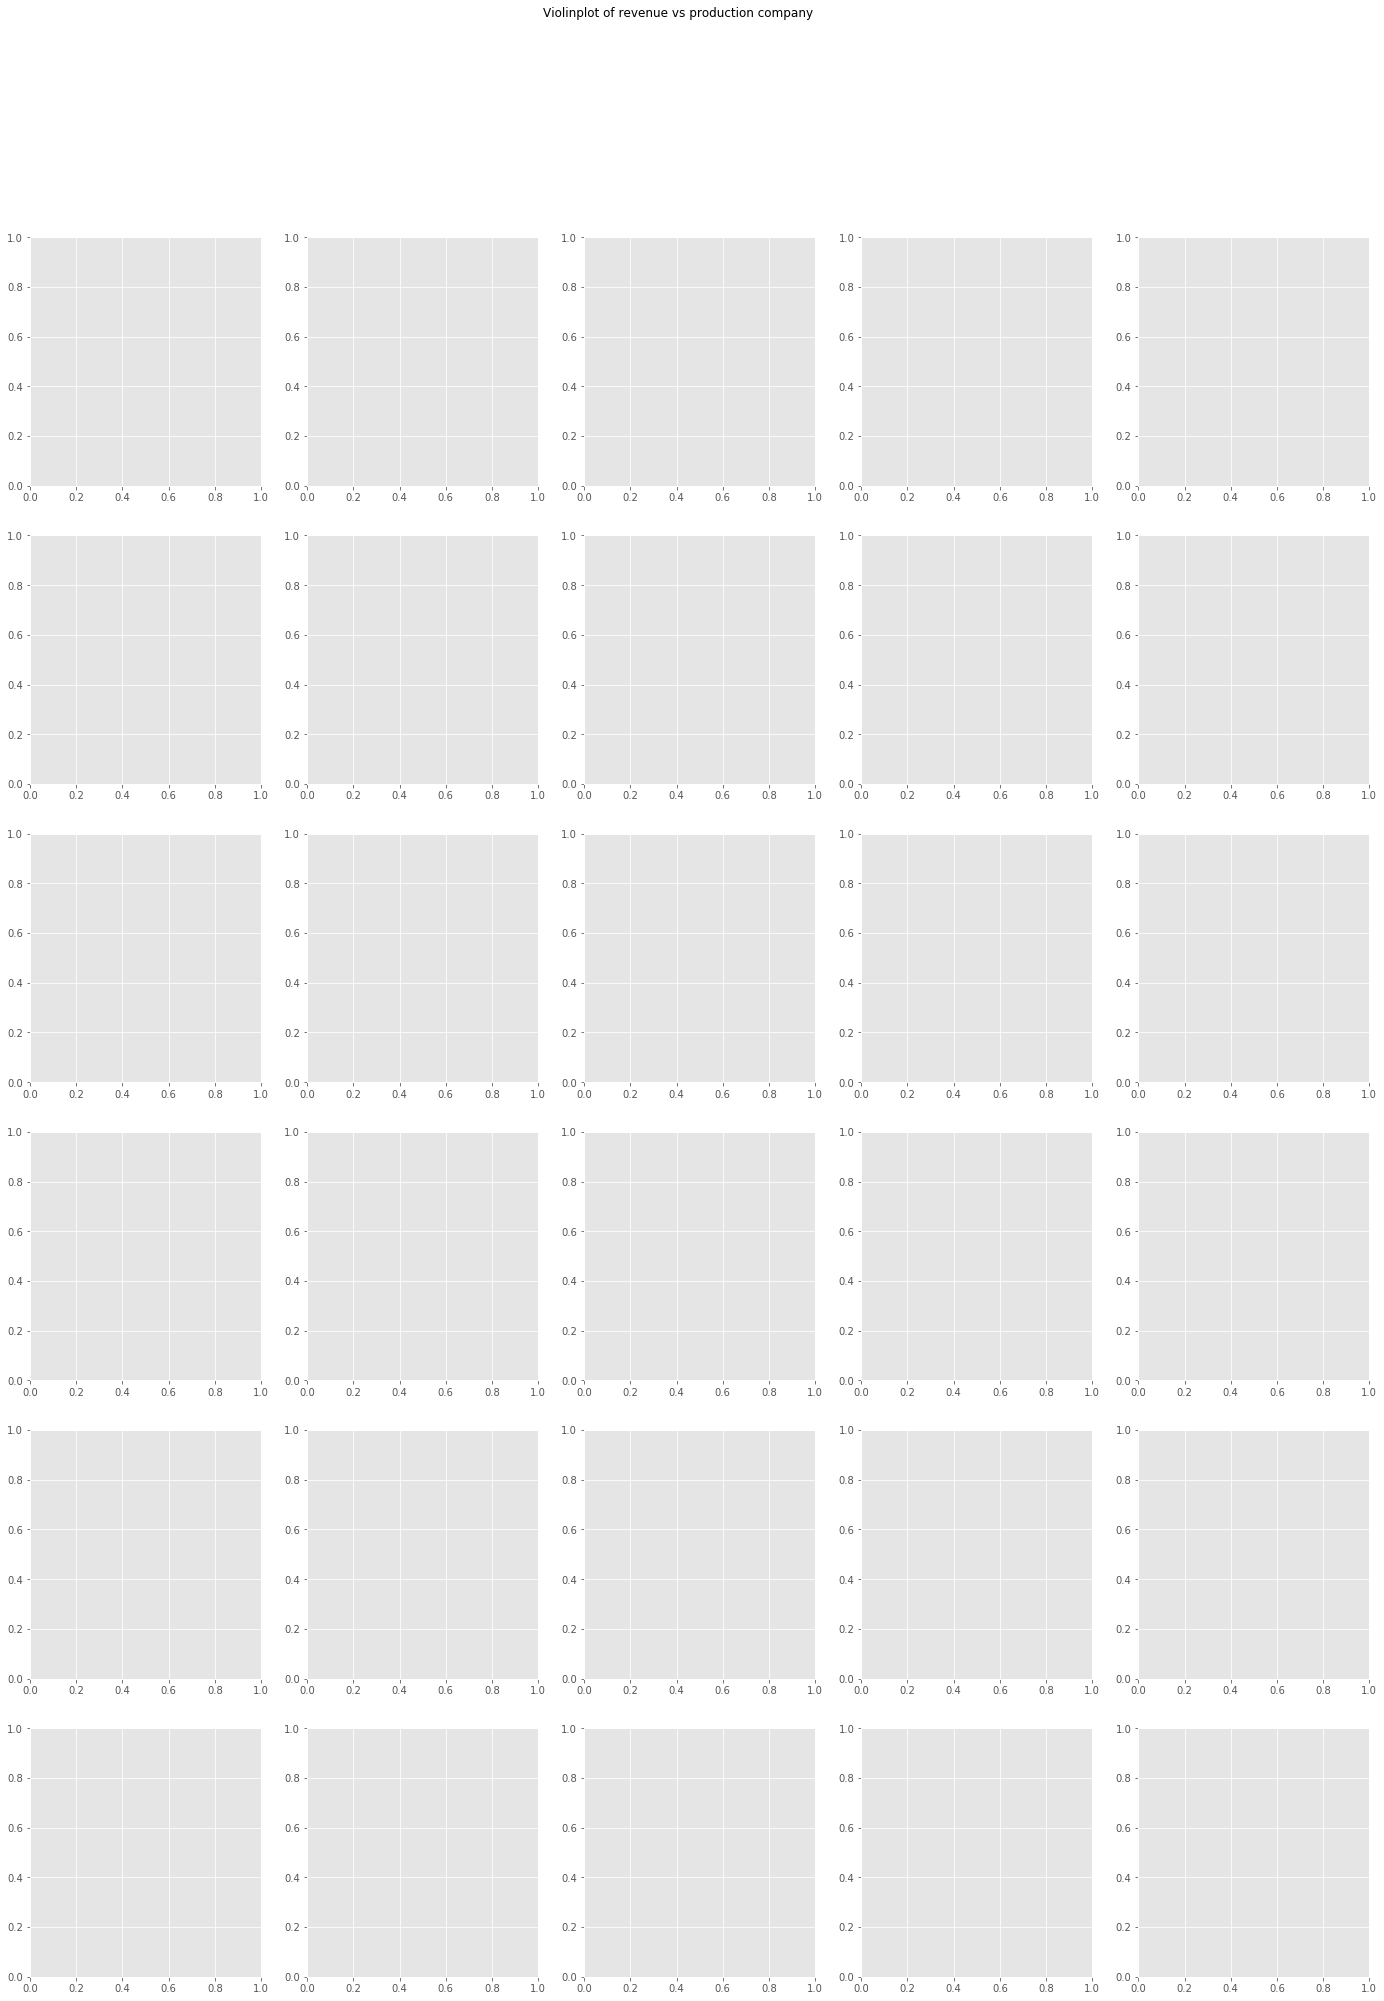

In [232]:
f, axes = plt.subplots(6, 5, figsize=(24, 32))
plt.suptitle('Violinplot of revenue vs production company')
for i, e in enumerate([col for col in train.columns if 'production_company' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 5][i % 5]);

In [233]:
# Modelling and feature generation

In [234]:
train = train.drop(['homepage','imdb_id','poster_path','release_date','status','log_revenue'],axis = 1)
test = test.drop(['homepage','imdb_id','poster_path','release_date','status'],axis = 1)

In [235]:
for col in train.columns:
    if train[col].nunique()==1:
        print(col)
        train.drop([col],axis = 1)
        test.drop([col],axis =1)

language_
cast_name_
cast_character_


In [236]:
for col in ['original_language','collection_name','all_genres']:
    le = LabelEncoder()
    le.fit(list(train[col].fillna(''))+list(test[col].fillna('')))
    train[col] = le.transform(train[col].fillna('').astype(str))
    test[col] = le.transform(test[col].fillna('').astype(str))

In [237]:
train_texts = train[['title','tagline','overview','original_title']]
test_texts = test[['title','tagline','overview','original_title']]

In [238]:
for col in ['title', 'tagline', 'overview', 'original_title']:
    train['len_' + col] = train[col].fillna('').apply(lambda x: len(str(x)))
    train['words_' + col] = train[col].fillna('').apply(lambda x: len(str(x.split(' '))))
    train = train.drop(col, axis=1)
    test['len_' + col] = test[col].fillna('').apply(lambda x: len(str(x)))
    test['words_' + col] = test[col].fillna('').apply(lambda x: len(str(x.split(' '))))
    test = test.drop(col, axis=1)

In [239]:
train.id[train.budget > 1000][train.revenue < 100]

312      313
450      451
1006    1007
1281    1282
1541    1542
1884    1885
2090    2091
2490    2491
Name: id, dtype: int64

In [240]:
# data fixes from https://www.kaggle.com/somang1418/happy-valentines-day-and-keep-kaggling-3
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'revenue'] = 6800000       # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
test.loc[test['id'] == 3889,'budget'] = 15000000       # Colossal
test.loc[test['id'] == 6733,'budget'] = 5000000        # The Big Sick
test.loc[test['id'] == 3197,'budget'] = 8000000        # High-Rise
test.loc[test['id'] == 6683,'budget'] = 50000000       # The Pink Panther 2
test.loc[test['id'] == 5704,'budget'] = 4300000        # French Connection II
test.loc[test['id'] == 6109,'budget'] = 281756         # Dogtooth
test.loc[test['id'] == 7242,'budget'] = 10000000       # Addams Family Values
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee

power_six = train.id[train.budget > 1000][train.revenue < 100]

for k in power_six :
    train.loc[train['id'] == k,'revenue'] =  train.loc[train['id'] == k,'revenue'] * 1000000

In [241]:
to_be_deleted = ['all_companies','all_countries','all_languages','all_Keywords',]

train=train.drop(to_be_deleted,axis = 1)
test = test.drop(to_be_deleted,axis = 1)

X = train.drop(['id', 'revenue'], axis=1)
y = np.log1p(train['revenue'])
X_test = test.drop(['id'], axis=1)

In [242]:
from sklearn.model_selection import train_test_split,KFold
X_train,X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.1)

In [244]:

import lightgbm as lgb

params = {
    'num_leaves':30,
    'min_data_in_leaf':20,
    'max_depth':5,
    'learning_rate':0.01,
    'boosting':'gbdt',
    'feature_fraction':0.9,
    'bagging_fraction':0.9,
    'bagging_freq':1,
    'bagging_seed':11,
    'metric':'rmse',
    'lambda_l1':0.2,
    'verbosity':-1,
    'objective':'regression'
}

model1 = lgb.LGBMRegressor(**params,n_estimators=20000,nthread=4,n_jobs=-1)
model1.fit(X_train,y_train,
           eval_set=[(X_train,y_train),(X_valid,y_valid)],eval_metric='rmse',
           verbose=1000,early_stopping_rounds=200)

LightGBMError: Do not support non-ASCII characters in feature name.